In [9]:
# import of libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 
sns.set(rc={'figure.figsize':(10,6)})

We will now proceed by loading the dataset

In [12]:
house = pd.read_csv('housing.csv')
print('Dataset read successfully')

Dataset read successfully


In [11]:
house.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


We will now proceed with an Exploratory Data Analysis in order to understand the data, clean and optimize it for the best result. First we look for missing values.

In [13]:
house.isnull().sum

<bound method DataFrame.sum of      price   area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    False  False     False      False    False     False      False   
1    False  False     False      False    False     False      False   
2    False  False     False      False    False     False      False   
3    False  False     False      False    False     False      False   
4    False  False     False      False    False     False      False   
..     ...    ...       ...        ...      ...       ...        ...   
540  False  False     False      False    False     False      False   
541  False  False     False      False    False     False      False   
542  False  False     False      False    False     False      False   
543  False  False     False      False    False     False      False   
544  False  False     False      False    False     False      False   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0       False            False    

Let's explore the correlation between variables

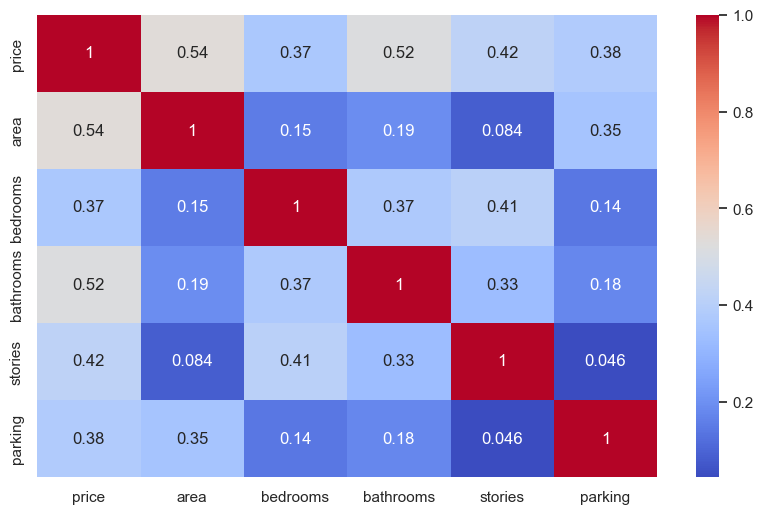

In [16]:
numeric_data = house.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [20]:
print(house.columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


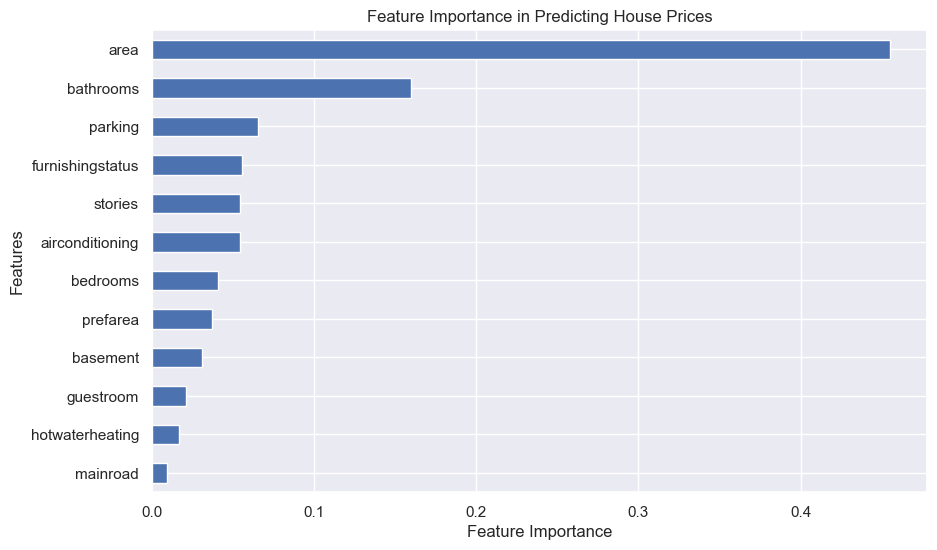

In [21]:
from sklearn.ensemble import RandomForestRegressor

house_encoded = house.copy()
for col in house_encoded.select_dtypes(include=['object']).columns:
    house_encoded[col] = house_encoded[col].astype('category').cat.codes

X = house_encoded.drop('price', axis=1)
y = house_encoded['price']

model = RandomForestRegressor()
model.fit(X, y)

# Plot feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.sort_values().plot(kind='barh', figsize=(10, 6))
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Predicting House Prices')
plt.show()

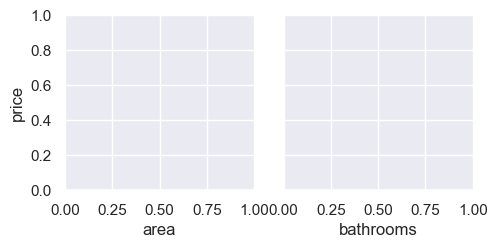

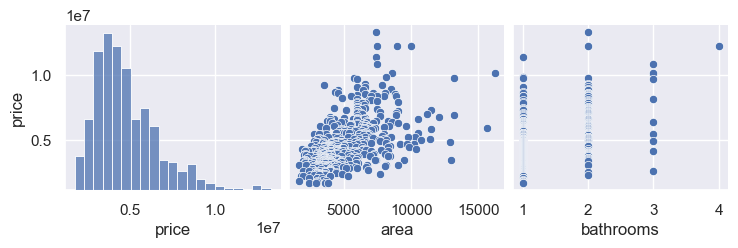

In [23]:
numeric_columns = ['price', 'area', 'bathrooms']

sns.pairplot(house[numeric_columns], y_vars='price')
plt.show()

Now we move to the data preprocessing phase. This is a crucial step as the quality of data that is used to train the model also determines the accuracy and efficiency of the model. This code prepares the dataset to build a predictive model that uses area to predict price.

In [25]:
X = house[['area']]
y = house['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

It is finally time to create and train our linear regression model. We create a model by calling an instance of the model into a variable as shown below and train the model by fitting the training dataset into the model. 

In [26]:
# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [29]:
# Make predictions
y_pred = model.predict(X_test)

After all these steps, we will proceed with the evaluation of the model. 

In [31]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Using precision score
model.score(X_test, y_test)

Mean Squared Error: 3675286604768.185


0.27287851871974644

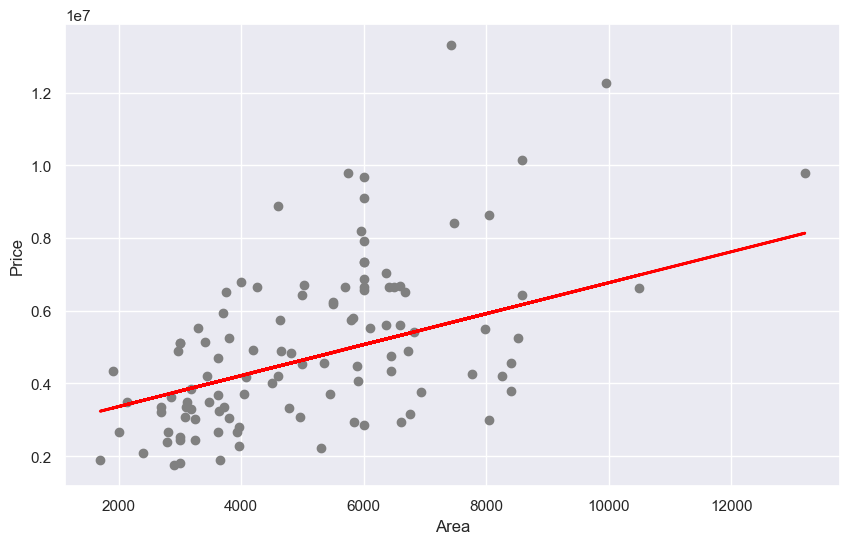

In [33]:
# Plot the regression line
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()